# Semantic Model
The code bellow refers to https://github.com/jakugel/oct-choroid-seg and contains recommendations to read in area segmentations.
The boundaries are the ILM, RPE and CSI. For the semantic segmentation these regions (areas) are needed:

1. Vitreous (top of the image to ILM)
2. Retinal (ILM to RPE)
3. Choroid (RPE to CHR)
4. Sclera (CHR to bottom of the image)

## Loading Area Labels
The semantic model requires image area segmentations, but the functions `load_training_data` and `load_validation_data` in `train_script_semantic_general.py` are written for segmentation files that contain boundaries. 

These boundaries are then converted to areas or “masks” in function `create_all_area_masks(images, segs)`.

If the input training labels are area labels, the function `create_all_area_masks` does not need to convert boundaries to areas. It should be enough to set `mask = segs`.

##Dependencies
See [oct-choroid-seg github Readme](https://github.com/jakugel/oct-choroid-seg)


# Code Modifications
`create_all_area_masks` calls `create_area_mask(image, segs)` for all training or evaluation image and label pairs.

`create_area_mask(image, segs)` sets `mask = segs` **if the dimensions are the same and dtype is uint8**.

<div class="alert-danger">
Segmentation png files received from Rihabh's lab are of type float32. They need to be saved as uint8.
</div>

Image and segs are loaded with matplotlib. 

<div class="alert-warning">
In the code below we are inspecting the images but the code should be removed or commented out.
</div>

uint8
(616, 1592, 3)


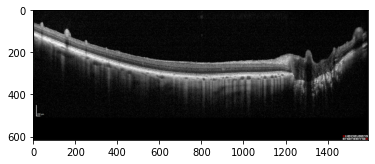

float32
(616, 1592, 3)


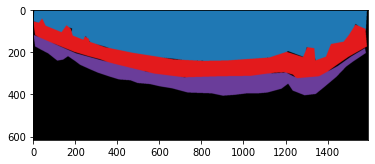

In [1]:
import numpy as np
from matplotlib import image as mplimage
from matplotlib import pyplot

def create_area_mask(image, segs):
    
    #verify image & segs have the same dimensions

    #if (image.shape == segs.shape and segs.dtype == uint8):

    if (image.shape == segs.shape):
        mask = segs
    
    return mask

# load image as pixel array

image = mplimage.imread('000.tif')

# Verify image is correct: summarize shape of the pixel array
print(image.dtype)
print(image.shape)

# Verify image is correct: display the array of pixels as an image

pyplot.imshow(image)
pyplot.show()

# load image as pixel array

segs = mplimage.imread('000.png')




masks = create_area_mask(image, segs)
if masks.all():
  print("Mask is empty")
else:
    # Verify mask is correct: summarize shape of the pixel array
    print(masks.dtype)
    print(masks.shape)

    # Verify mask is correct: display the array of pixels as an image

    pyplot.imshow(masks)
    pyplot.show()



